In [ ]:
!pip install -q roboflow 
!pip install -q ultralytics
!pip install -q torch
!pip install -q wandb
!pip install -q torchvision

In [1]:
from kaggle_secrets import UserSecretsClient
secret_label = "RoboFlowAPI"
RoboFlowAPI = UserSecretsClient().get_secret(secret_label)

In [2]:
!mkdir /kaggle/working/datasets
%cd /kaggle/working/datasets

/kaggle/working/datasets


In [3]:
pwd

'/kaggle/working/datasets'

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key=RoboFlowAPI)
project = rf.workspace("sign-recognintion").project("sign-recoginition")
dataset = project.version(1).download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sign-recoginition-1 in yolov8-obb:: 100%|██████████| 9862/9862 [00:01<00:00, 8105.36it/s] 


In [5]:
import yaml

with open("/kaggle/working/datasets/Sign-recoginition-1/data.yaml","r") as f:
    data = yaml.safe_load(f)

In [6]:
with open("/kaggle/working/datasets/Sign-recoginition-1/README.dataset.txt","r") as f:
    content = f.read()

    
print(content)

# Sign recoginition > 2023-03-03 5:34pm
https://universe.roboflow.com/sign-recognintion/sign-recoginition

Provided by a Roboflow user
License: CC BY 4.0




In [7]:
data

{'path': '../datasets/roboflow',
 'train': 'train/images',
 'val': 'valid/images',
 'test': 'test/images',
 'names': {0: 1,
  1: 2,
  2: 3,
  3: 4,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 'A',
  10: 'B',
  11: 'C',
  12: 'D',
  13: 'E',
  14: 'ExcuseMe',
  15: 'F',
  16: 'Food',
  17: 'G',
  18: 'H',
  19: 'Hello',
  20: 'Help',
  21: 'House',
  22: 'I',
  23: 'I Love You',
  24: 'Internet',
  25: 'J',
  26: 'K',
  27: 'L',
  28: 'M',
  29: 'N',
  30: False,
  31: 'O',
  32: 'P',
  33: 'Please',
  34: 'Q',
  35: 'R',
  36: 'S',
  37: 'T',
  38: 'ThankYou',
  39: 'U',
  40: 'V',
  41: 'W',
  42: 'X',
  43: 'Y',
  44: True,
  45: 'Z'}}

In [8]:
data['path'] = "/kaggle/working/datasets/Sign-recoginition-1"

In [9]:
!rm -rf /kaggle/working/datasets/Sign-recoginition-1/data.yaml

In [10]:
with open("/kaggle/working/datasets/Sign-recoginition-1/data.yaml","w") as f:
    yaml.dump(data,f)


In [11]:
!wandb login --verify "YOUR_API_KEY"

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [12]:
from ultralytics import YOLO
model = YOLO("yolov8x-obb.pt")

100%|██████████| 133M/133M [00:00<00:00, 170MB/s]  


In [16]:
model.train(
    data="/kaggle/working/datasets/Sign-recoginition-1/data.yaml", 
    epochs=50,
    imgsz=640,
    workers=32,
    batch=32,
    cache=True,
    device=[0, 1],
    name="First Run on Roboflow",
    save=True,
    optimizer='AdamW',
    cos_lr=True,
    amp=True,
    lr0=0.001,
    lrf=0.02,
    weight_decay=0.0005,
    verbose=True,
    val=True,
    plots=True,
    pretrained="yolov8x-obb.pt",
    dropout=0.15
)

Ultralytics YOLOv8.1.17 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                      CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8x-obb.pt, data=/kaggle/working/datasets/Sign-recoginition-1/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=[0, 1], workers=32, project=None, name=First Run on Roboflow, exist_ok=False, pretrained=yolov8x-obb.pt, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

2024-02-22 03:43:31.252006: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 03:43:31.252066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 03:43:31.253635: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorBoard: Start with 'tensorboard --logdir runs/obb/First Run on Roboflow', view at http://localhost:6006/


wandb: Currently logged in as: kaus1kc0des (zer0ne). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.16.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.2
wandb: Run data is saved locally in /kaggle/working/datasets/wandb/run-20240222_034334-q32yno69
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run First Run on Roboflow
wandb: ⭐️ View project at https://wandb.ai/zer0ne/YOLOv8
wandb: 🚀 View run at https://wandb.ai/zer0ne/YOLOv8/runs/q32yno69


Overriding model.yaml nc=15 with nc=46
Transferred 631/637 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 68.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/Sign-recoginition-1/train/labels... 4289 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4289/4289 [00:04<00:00, 973.10it/s] 


train: New cache created: /kaggle/working/datasets/Sign-recoginition-1/train/labels.cache


train: Caching images (4.9GB True): 100%|██████████| 4289/4289 [00:10<00:00, 404.97it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/Sign-recoginition-1/valid/labels... 414 images, 0 backgrounds, 0 corrupt: 100%|██████████| 414/414 [00:00<00:00, 1365.80it/s]


val: New cache created: /kaggle/working/datasets/Sign-recoginition-1/valid/labels.cache


val: Caching images (0.5GB True): 100%|██████████| 414/414 [00:02<00:00, 181.63it/s]


Plotting labels to runs/obb/First Run on Roboflow/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 103 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/obb/First Run on Roboflow
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      14.2G      1.229      2.942      3.116          2        640: 100%|██████████| 135/135 [02:55<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.733      0.464      0.605      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        15G      1.042      1.764      2.873          2        640: 100%|██████████| 135/135 [02:54<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.724      0.827      0.899      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        15G     0.9501      1.437      2.755          2        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.787      0.755      0.874      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        15G     0.9076      1.284      2.672          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.811      0.783      0.889      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        15G     0.8442      1.114      2.613          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.925      0.888      0.936      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        15G     0.7803     0.9646       2.55          2        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.858      0.916      0.947      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        15G     0.7382     0.8806      2.504          2        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.893      0.916      0.944      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        15G     0.7402     0.8729      2.495          2        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.927      0.938      0.947      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      15.1G      0.698     0.8502      2.434          0        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.846       0.91      0.941      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        15G     0.6832     0.7711      2.424          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.926      0.907      0.938      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        15G     0.6567      0.688      2.375          3        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.927      0.908      0.942      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        15G     0.6462     0.6955       2.33          0        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.848      0.905       0.95      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      15.1G     0.6459     0.6755      2.389          1        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.938      0.922      0.945      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        15G     0.6584     0.6852      2.387          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.889      0.949      0.951       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      15.1G     0.6223     0.6416      2.337          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414       0.94      0.945      0.956      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        15G     0.6085     0.6188      2.292          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414       0.93      0.926      0.956      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      15.1G     0.5879     0.5692      2.273          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.926      0.948      0.959      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        15G     0.5801     0.5675      2.267          3        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.909      0.932       0.95       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        15G     0.5715     0.5492      2.275          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.916      0.932      0.947      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        15G     0.5562     0.5335      2.256          1        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.961      0.914      0.947      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      15.1G     0.5585     0.5348      2.258          2        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.962      0.931      0.953      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        15G     0.5433     0.5199      2.257          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.945      0.927      0.942      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      15.1G     0.5204     0.4998       2.21          1        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.893      0.922      0.942      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        15G     0.5251     0.4838      2.218          2        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.909      0.958      0.963      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        15G     0.5217     0.4868       2.23          3        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414       0.88      0.947      0.959      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      15.1G     0.4863     0.4355       2.19          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.923      0.948      0.953      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        15G     0.4942     0.4483      2.162          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.946      0.942       0.96       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        15G     0.4862     0.4116      2.162          2        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.898      0.972      0.958      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50        15G     0.4842     0.4243       2.17          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.942      0.926      0.955      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        15G     0.4773     0.4154      2.157          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.923      0.973      0.967      0.868

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        15G     0.4594        0.4      2.141          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.947      0.933      0.955      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        15G     0.4523      0.382      2.131          1        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414       0.89      0.941      0.942      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        15G     0.4533     0.3807      2.164          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.974       0.93      0.954      0.862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      15.1G     0.4404     0.3718      2.151          3        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414       0.98      0.934      0.956      0.862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        15G     0.4326     0.3558      2.137          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.946      0.944      0.952      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        15G      0.428     0.3576      2.124          3        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.966      0.937      0.956      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        15G     0.4231     0.3485      2.142          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.983      0.934      0.957      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        15G     0.4237     0.3485      2.119          4        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.972      0.935      0.951      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        15G     0.4119     0.3461      2.107          3        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.974      0.932      0.957      0.868
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        15G     0.2214     0.2403      1.931          1        640: 100%|██████████| 135/135 [02:52<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.986      0.932      0.953      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        15G     0.2059     0.2125      1.904          1        640: 100%|██████████| 135/135 [02:51<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.985      0.936      0.954      0.868

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        15G     0.1994     0.2599      1.862          1        640: 100%|██████████| 135/135 [02:51<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.989      0.932      0.945      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        15G     0.1907     0.2124      1.876          1        640: 100%|██████████| 135/135 [02:51<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414       0.99      0.935      0.948      0.868

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      15.1G     0.1848      0.202      1.889          1        640: 100%|██████████| 135/135 [02:51<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.988      0.935       0.95      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        15G     0.1816     0.1921      1.885          1        640: 100%|██████████| 135/135 [02:51<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.985      0.935      0.949      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        15G     0.1804     0.1942      1.849          1        640: 100%|██████████| 135/135 [02:51<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.989      0.935      0.947      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        15G      0.172     0.1858      1.862          1        640: 100%|██████████| 135/135 [02:51<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.988      0.935      0.946      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      15.1G     0.1694     0.1795      1.863          1        640: 100%|██████████| 135/135 [02:51<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        414        414      0.989      0.935      0.946      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        15G      0.162     0.1782      1.856          1        640: 100%|██████████| 135/135 [02:51<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        414        414      0.987      0.934      0.946      0.871

50 epochs completed in 2.647 hours.
Optimizer stripped from runs/obb/First Run on Roboflow/weights/last.pt, 139.7MB
Optimizer stripped from runs/obb/First Run on Roboflow/weights/best.pt, 139.7MB

Validating runs/obb/First Run on Roboflow/weights/best.pt...
Ultralytics YOLOv8.1.17 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                      CUDA:1 (Tesla T4, 15102MiB)
YOLOv8x-obb summary (fused): 287 layers, 69493389 parameters, 0 gradients, 263.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


                   all        414        414      0.989      0.935      0.947      0.874
                     1        414         10      0.986          1      0.995      0.891
                     2        414         10      0.985          1      0.995      0.931
                     3        414         10          1          1      0.995      0.945
                     4        414         10          1          1      0.995      0.978
                     5        414         10      0.986          1      0.995      0.922
                     6        414         10          1          1      0.995      0.901
                     7        414         10          1          1      0.995      0.924
                     8        414         10          1          1      0.995      0.981
                     9        414         10          1          1      0.995       0.92
                     A        414         10          1          1      0.995      0.974
                     

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 █▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:                  lr/pg1 ▃▆██████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
wandb:                  lr/pg2 ▃▆██████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
wandb:        metrics/mAP50(B) ▁▇▆▇████████████████████████████████████
wandb:     metrics/mAP50-95(B) ▁▅▅▆▇▇▇▇▇▇▇▇▇██▇▇▇▇█████████████████████
wandb:    metrics/precision(B) ▁▁▃▃▅▅▆▄▆▄▇▅▆▆▆▆▇▇▅▆▅▆▇▆▆▇▅█▇▇██████████
wandb:       metrics/recall(B) ▁▆▅▅▇▇█▇▇��▇█▇█▇▇▇▇▇██████▇█▇█▇▇▇▇▇▇▇▇▇▇▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▆▅▅▅▅▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▁▁▁▁▁▁▁▁
wandb:          train/cls_loss █▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▇▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▁▁▁▁▁▁▁▁
wandb:            val/box_loss █▄▅▄▂▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁

In [ ]:
model.save("/kaggle/working/working_model_sign_lang_detect.h5")

In [1]:
type(model)

NameError: name 'model' is not defined

In [ ]:
model.export(format="onnx", verbose=True)

In [ ]:
model.export(format="saved_model",keras=True, verbose=True)

In [ ]:
model.export(format="torchscript", verbose=True)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/working/datasets/runs/obb/First Run on Roboflow/results.csv")

In [4]:
df

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.22880,2.94240,3.1158,0.73349,0.46403,0.60452,0.41858,1.20780,4.01490,3.2571,0.067244,0.000331,0.000331
1,2,1.04230,1.76380,2.8727,0.72387,0.82662,0.89931,0.70522,0.80162,1.19430,3.0112,0.034244,0.000664,0.000664
2,3,0.95007,1.43670,2.7545,0.78732,0.75461,0.87405,0.66481,0.92753,1.24840,3.0975,0.001241,0.000994,0.000994
3,4,0.90760,1.28450,2.6719,0.81072,0.78290,0.88944,0.71900,0.77751,0.97803,2.9684,0.000991,0.000991,0.000991
4,5,0.84423,1.11390,2.6134,0.92483,0.88770,0.93628,0.79327,0.68564,0.58113,2.8666,0.000991,0.000991,0.000991
5,6,0.78033,0.96463,2.5503,0.85833,0.91601,0.94719,0.81417,0.59877,0.53961,2.7588,0.000985,0.000985,0.000985
6,7,0.73824,0.88061,2.5041,0.89332,0.91570,0.94387,0.79671,0.69146,0.52226,2.7541,0.000976,0.000976,0.000976
7,8,0.74022,0.87285,2.4946,0.92693,0.93771,0.94709,0.80540,0.62603,0.52880,2.7792,0.000966,0.000966,0.000966
8,9,0.69802,0.85022,2.4339,0.84578,0.91008,0.94149,0.80238,0.63249,0.70420,2.8202,0.000953,0.000953,0.000953
9,10,0.68316,0.77106,2.4237,0.92626,0.90666,0.93801,0.80309,0.63774,0.50222,2.8212,0.000939,0.000939,0.000939


In [5]:
import seaborn as sns

In [11]:
# Rename all the columns removing all whitespaces
df.columns = df.columns.str.replace(' ','')

In [12]:
df.columns.to_list()

['epoch',
 'train/box_loss',
 'train/cls_loss',
 'train/dfl_loss',
 'metrics/precision(B)',
 'metrics/recall(B)',
 'metrics/mAP50(B)',
 'metrics/mAP50-95(B)',
 'val/box_loss',
 'val/cls_loss',
 'val/dfl_loss',
 'lr/pg0',
 'lr/pg1',
 'lr/pg2']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='epoch', ylabel='metrics/mAP50-95(B)'>

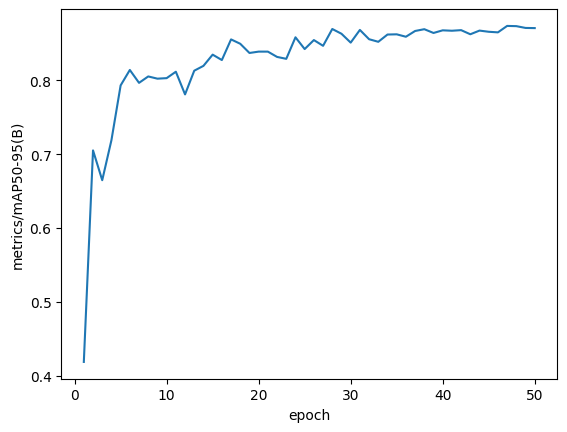

In [13]:

sns.lineplot(data=df,x='epoch',y= 'metrics/mAP50-95(B)')